In [1]:
from COCOevalPlus import COCOevalPlus
from VisualizeUtils import *
from sys import stdout

In [2]:
mycocoeval = COCOevalPlus('path/to/srcjson','path/to/resjson')

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=4.63s)
creating index...
index created!


In [3]:
confusion_matrix = mycocoeval.getConfusionMatrix()

Processed 100 images
Processed 200 images
Processed 300 images
Processed 400 images
Processed 500 images
Processed 600 images
Processed 700 images
Processed 800 images
Processed 840 images


In [4]:
confusion_matrix

array([[2843,    5,   22,    0,    0, 2448],
       [   1, 1236,    0,    0,    0,  841],
       [  38,    0,  275,    0,    0,  249],
       [   0,    4,    0,   82,    7,   88],
       [   0,    0,    0,    3,   71,   61],
       [ 132,   54,   38,   11,    6,    0]], dtype=int64)

In [5]:
category_id_to_name = {}
for category in mycocoeval.sources.loadCats(mycocoeval.coco_eval.params.catIds):
    category_id_to_name[category['id']]=category['name']
category_id_to_name[6]='background'
label=category_id_to_name.values()
category_id_to_name,label

({1: 'car',
  2: 'person',
  3: 'bus',
  4: 'motorbike',
  5: 'bicycle',
  6: 'background'},
 dict_values(['car', 'person', 'bus', 'motorbike', 'bicycle', 'background']))

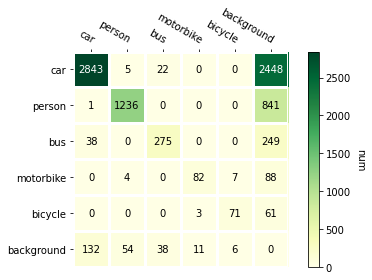

In [6]:
fig, ax = plt.subplots()
im, cbar = heatmap(confusion_matrix, label, label, ax=ax,
                   cmap="YlGn", cbarlabel="num")
texts = annotate_heatmap(im, valfmt="{x}")
fig.tight_layout()
plt.show()

In [7]:
mycocoeval.coco_eval.outputfile = stdout
mycocoeval.getMapMar()

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=17.97s).
Accumulating evaluation results...
DONE (t=2.50s).
------------------------------------------------------------------------------------
 Average Precision  (AP) @[ CategoryId=  1 | IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.499
 Average Precision  (AP) @[ CategoryId=  1 | IoU=0.50      | area=   all | maxDets=100 ] = 0.774
 Average Precision  (AP) @[ CategoryId=  1 | IoU=0.75      | area=   all | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ CategoryId=  1 | IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.272
 Average Precision  (AP) @[ CategoryId=  1 | IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.639
 Average Precision  (AP) @[ CategoryId=  1 | IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.737
 Average Recall     (AR) @[ CategoryId=  1 | IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.096
 Average Recall     (AR) @[ CategoryId=  1 | IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.388
 Averag

0.45494761600684086

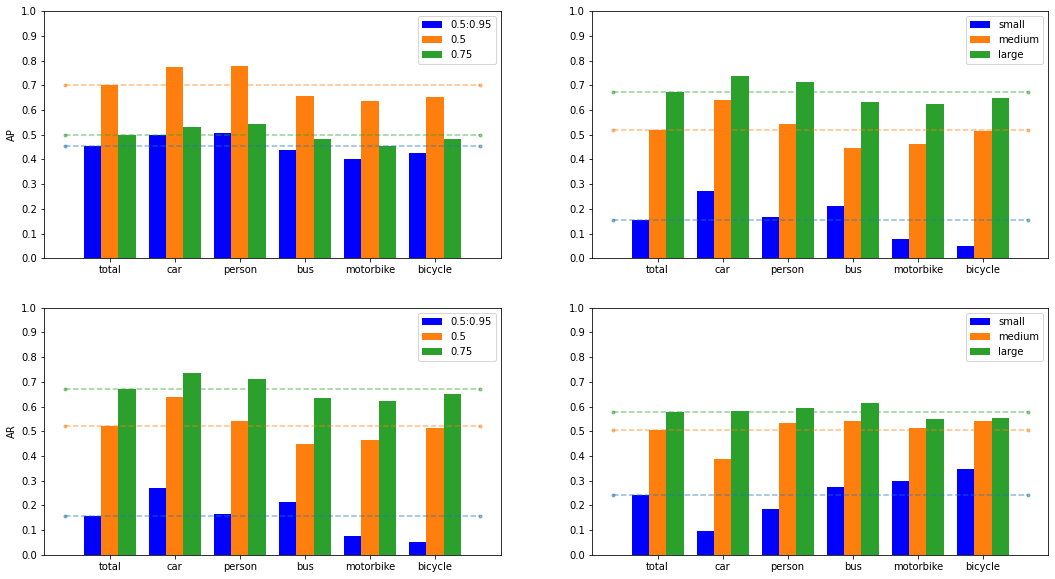

In [8]:
label = ['total', 'car', 'person', 'bus', 'motorbike', 'bicycle']
total_stats = np.concatenate( (mycocoeval.coco_eval.stats[:, np.newaxis], mycocoeval.coco_eval.category_stats), axis=1) 
drawCatEvalBar(total_stats, label, savepath=None)